In [1]:
# import Library yang dibutuhkan
import pandas as pd                   #dataframe manipulation
import numpy as np                    #scientific camputing
import seaborn as sns                 #visualization
import matplotlib.pyplot as plt       #visualization
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')


# Tables yang akan digunakan
'''
name.basics.tsv.gz
title.basics.tsv.gz
title.crew.tsv.gz
title.episode.tsv.gz
title.ratings.tsv.gz
'''

# Load all the TSV file into a DataFrame
#df = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/name.basics.tsv", sep='\t', na_values="\\N") 
#df = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.basics.tsv", sep='\t', na_values="\\N") 
#title_crew = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.crew.tsv", sep='\t')
df = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.episode.tsv", sep='\t', na_values="\\N") #formatting penulisan NaN
#title_ratings = pd.read_csv("C:/Users/HP/Desktop/Data IMDb/title.ratings.tsv", sep='\t')

# Display the first 5 rows
df.head()
#title_basics.head()
#title_crew.head()
#title_episode.head()
#title_ratings.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0031458,tt32857063,NaN,NaN
1,tt0041951,tt0041038,1.0,9.0
2,tt0042816,tt0989125,1.0,17.0
3,tt0042889,tt0989125,NaN,NaN
4,tt0043426,tt0040051,3.0,42.0


In [3]:
'''Data Wrangling'''

# Cek tipe data
df.dtypes

tconst            object
parentTconst      object
seasonNumber     float64
episodeNumber    float64
dtype: object

In [9]:
# Menunjukkan Duplicates
df[df.duplicated()]

,tconst,parentTconst,seasonNumber,episodeNumber


In [11]:
# Cek Missing Values
print(df.isnull().sum())

tconst                 0
parentTconst           0
seasonNumber     1747283
episodeNumber    1747283
dtype: int64


In [13]:
'''Ternyata ada missing value, kita akan hapus'''

df = df.dropna()
df.count()

tconst           6915500
parentTconst     6915500
seasonNumber     6915500
episodeNumber    6915500
dtype: int64

In [17]:
df['seasonNumber'] = df['seasonNumber'].astype(int)
df['episodeNumber'] = df['episodeNumber'].astype(int)
df.dtypes

tconst           object
parentTconst     object
seasonNumber      int32
episodeNumber     int32
dtype: object

In [21]:
# Untuk melihat nilai unik tiap kolom
#df["seasonNumber"].unique()
df["seasonNumber"].describe()

count    6.915500e+06
mean     3.780866e+00
std      2.393823e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      2.024000e+03
Name: seasonNumber, dtype: float64

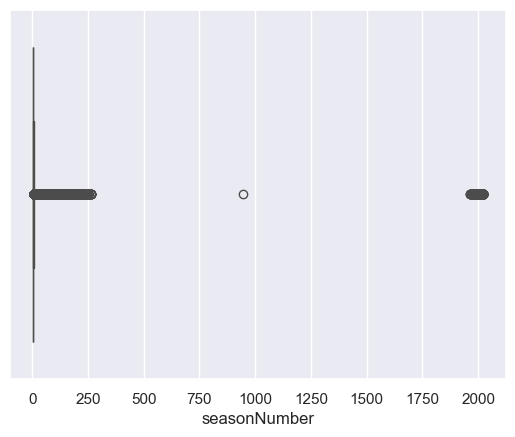

In [25]:
# Cek outlier dg boxplot
sns.boxplot(x=df['seasonNumber'])

plt.show()

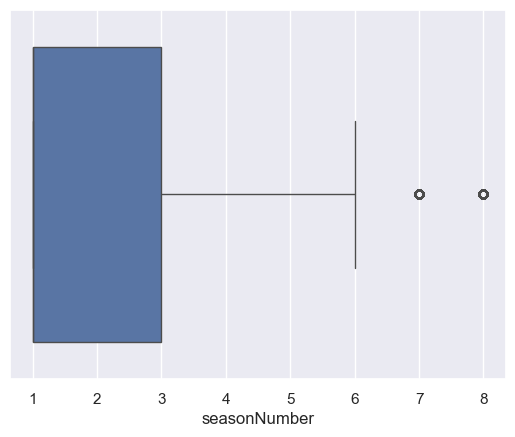

In [42]:
'''range season dibatasi 0 - 8'''
df = df[(df['seasonNumber'] <= 8)]

sns.boxplot(x=df['seasonNumber'])

plt.show()

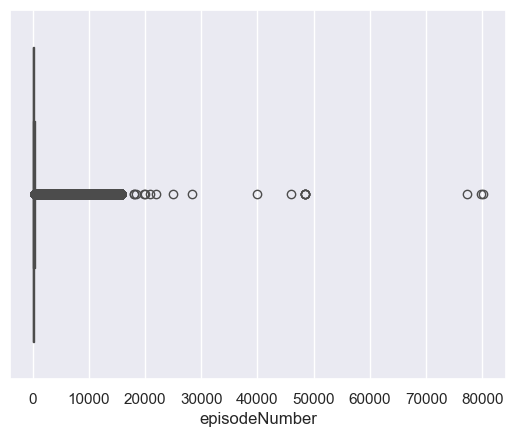

count    6.389245e+06
mean     4.522872e+02
std      1.378072e+03
min      0.000000e+00
25%      7.000000e+00
50%      2.900000e+01
75%      1.770000e+02
max      8.020700e+04
Name: episodeNumber, dtype: float64

In [34]:
# Cek outlier dg boxplot
sns.boxplot(x=df['episodeNumber'])

plt.show()
df["episodeNumber"].describe()

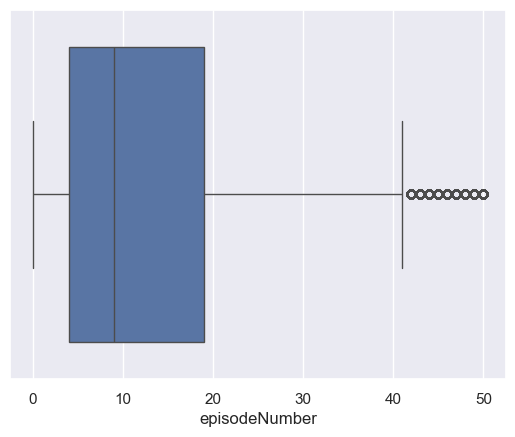

In [44]:
'''range season dibatasi 0 - 50'''
df = df[(df['episodeNumber'] <= 50)]
sns.boxplot(x=df['episodeNumber'])

plt.show()


In [62]:
# Grouping

df_sorted = df.sort_values(by='parentTconst', ascending=False)
#total_episodes = df_sorted.groupby('parentTconst')['tconst'].count()
#parentTconst adalah kesatuan series/judul

episodes_per_season = df.groupby(['parentTconst', 'seasonNumber'])['tconst'].count()
#jumlah episode di setiap musim untuk setiap serial

print(episodes_per_season)


parentTconst  seasonNumber
tt0035599     1                1
tt0035803     6                6
tt0038276     1                1
tt0039120     1                1
tt0039122     1                5
                              ..
tt9916216     1               50
tt9916380     1               12
tt9916678     1               13
              2               10
              3                8
Name: tconst, Length: 298689, dtype: int64


In [64]:
df.head()

,tconst,parentTconst,seasonNumber,episodeNumber
1,tt0041951,tt0041038,1,9
2,tt0042816,tt0989125,1,17
4,tt0043426,tt0040051,3,42
5,tt0043631,tt0989125,2,16
6,tt0043693,tt0989125,2,8


In [66]:
'''Export Dataframe'''

# Export into CSV
df.to_csv("C:/Users/HP/Desktop/Data IMDb/title.episode.csv", index=False)